# Ontologies and text mining

> Overview:

*   Exact match with a dictionary
*   Word2Vec





In this tutorial, you will learn how text embeddings can be generated and used to facilitate learning from text.





In [2]:
!pip install scikit-learn
!pip install gensim
import matplotlib.pyplot as plt
from google.colab import drive
import gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


We create a dictionary for our `Family Ontology` 

In [3]:
dictionary={'father': 'http://Father', 'female': 'http://Female', 'male': 'http://Male', 'mother': 'http://Mother', 'parent': 'http://Parent', 'person': 'http://Person'}

Let us look at the following text:


**Can we identify that "parent" and "mother" are both an instance of the class "http://Parent"?**

In [4]:
text="Sarah's only parent was her mother"

 

*   Using a dictionary, let us first split the text into words. We do that by using the space as a delimiter.
*   We next look up each word in our dictionary.




In [6]:
tokens = text.split(' ')
print('The splitted text looks as follows: ', tokens)
for i,token in enumerate(tokens):
  if token in dictionary:
    print('Identified mention of a class: ',token, 'which is the',i+1,'th token, is an instance of:', dictionary[token])

The splitted text looks as follows:  ["Sarah's", 'only', 'parent', 'was', 'her', 'mother']
Identified mention of a class:  parent which is the 3 th token, is an instance of: http://Parent
Identified mention of a class:  mother which is the 6 th token, is an instance of: http://Mother


We can only detect 'mother' and 'parent' which are an exact match to what we have in the dictionary.
However, we cannot link 'mother' to 'parent'.

Let us try Word2Vec embeddings which were trained on a large corpus:




In [8]:
drive.mount('/content/drive')
model=gensim.models.Word2Vec.load('/content/drive/MyDrive/PMC/RepresentationModel_pubmed.txt')

Mounted at /content/drive


We can visualize the embeddings of the ontology classes that we have:




/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


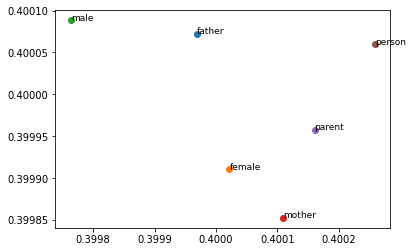

In [18]:
 from sklearn.manifold import TSNE
 import pandas as pd
 embeddings=[]
 classes=[]
 for class_ in dictionary:
   classes.append(class_)
   embeddings.append(model.wv[class_])
tsne_vectors = TSNE(early_exaggeration=1 ,random_state=6,init='random').fit_transform(embeddings)
for i,class_ in enumerate(classes):
  plt.scatter(tsne_vectors[i,0]+0.4,tsne_vectors[i,1]+0.4)
  plt.text(tsne_vectors[i,0]+0.4, tsne_vectors[i,1]+0.4, class_, fontsize=9)

We can see how 'mother' and 'female' are close to 'parent'. We can learn exact parameters to gague similarity. 
We can also check our previous example from slides, 'tumor' and 'tumour' and see the distance between them.

In [21]:
from scipy.spatial import distance
distance.cosine(model.wv['tumor'],model.wv['tumour'])

0.04161471128463745